In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('monthly.csv',header='infer')
data

,Year,Month,NAO,Nino,NCEP_Air,Temp
0,1979,1,28.34,-0.46,257.5871,17.3194
1,1979,2,27.95,0.52,260.4989,14.4929
2,1979,3,27.55,-0.09,269.4423,37.5290
3,1979,4,27.24,-0.73,279.7187,44.3967
4,1979,5,26.96,-0.36,286.7603,56.8323
...,...,...,...,...,...,...
487,2019,8,26.47,1.12,294.9306,70.0032
488,2019,9,26.54,0.38,293.7717,65.7067
489,2019,10,26.52,-0.88,280.4761,50.6258
490,2019,11,26.56,0.81,273.7293,33.8133


In [4]:
window_size = 12

X = pd.DataFrame()
for i in range(0, 12):
    col_name = "t-" + str(12 - i)
    T = data['Temp'].shift(periods = 12 - i).dropna()
    X[col_name] = T

X

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
12,17.3194,14.4929,37.5290,44.3967,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323
13,14.4929,37.5290,44.3967,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323,22.8710
14,37.5290,44.3967,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323,22.8710,20.3310
15,44.3967,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323,22.8710,20.3310,30.0097
16,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323,22.8710,20.3310,30.0097,44.7767
...,...,...,...,...,...,...,...,...,...,...,...,...
487,72.6226,65.3267,49.5032,33.9933,31.5613,21.5161,25.2393,32.0548,46.7000,56.4000,66.5433,74.6806
488,65.3267,49.5032,33.9933,31.5613,21.5161,25.2393,32.0548,46.7000,56.4000,66.5433,74.6806,70.0032
489,49.5032,33.9933,31.5613,21.5161,25.2393,32.0548,46.7000,56.4000,66.5433,74.6806,70.0032,65.7067
490,33.9933,31.5613,21.5161,25.2393,32.0548,46.7000,56.4000,66.5433,74.6806,70.0032,65.7067,50.6258


In [6]:
Y = data['Temp'].shift(-12).dropna()
Y

0      22.8710
1      20.3310
2      30.0097
3      44.7767
4      58.7323
        ...   
475    70.0032
476    65.7067
477    50.6258
478    33.8133
479    32.9871
Name: Temp, Length: 480, dtype: float64

In [8]:
years = data['Year'].values
train_indicies = [index - 12 for index , year in enumerate(years) if year <= 2009 and year >= 1980]
test_indicies = [index - 12 for index , year in enumerate(years) if year <= 2019 and year >= 2010]

x_train = X.iloc[train_indicies]
x_test = X.iloc[test_indicies]
y_train = Y.iloc[train_indicies]
y_test = Y.iloc[test_indicies]

x_train

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
12,17.3194,14.4929,37.5290,44.3967,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323
13,14.4929,37.5290,44.3967,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323,22.8710
14,37.5290,44.3967,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323,22.8710,20.3310
15,44.3967,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323,22.8710,20.3310,30.0097
16,56.8323,67.3800,70.1645,67.2742,62.7267,49.2710,38.4100,30.7323,22.8710,20.3310,30.0097,44.7767
...,...,...,...,...,...,...,...,...,...,...,...,...
367,69.0065,63.3167,48.6581,38.1133,25.1935,16.6581,27.7357,36.2194,46.5267,58.0323,66.4467,66.7387
368,63.3167,48.6581,38.1133,25.1935,16.6581,27.7357,36.2194,46.5267,58.0323,66.4467,66.7387,68.1226
369,48.6581,38.1133,25.1935,16.6581,27.7357,36.2194,46.5267,58.0323,66.4467,66.7387,68.1226,62.1067
370,38.1133,25.1935,16.6581,27.7357,36.2194,46.5267,58.0323,66.4467,66.7387,68.1226,62.1067,47.2484


In [9]:
x_test

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
372,16.6581,27.7357,36.2194,46.5267,58.0323,66.4467,66.7387,68.1226,62.1067,47.2484,43.4933,27.6806
373,27.7357,36.2194,46.5267,58.0323,66.4467,66.7387,68.1226,62.1067,47.2484,43.4933,27.6806,23.2903
374,36.2194,46.5267,58.0323,66.4467,66.7387,68.1226,62.1067,47.2484,43.4933,27.6806,23.2903,25.7464
375,46.5267,58.0323,66.4467,66.7387,68.1226,62.1067,47.2484,43.4933,27.6806,23.2903,25.7464,39.4581
376,58.0323,66.4467,66.7387,68.1226,62.1067,47.2484,43.4933,27.6806,23.2903,25.7464,39.4581,52.8933
...,...,...,...,...,...,...,...,...,...,...,...,...
487,72.6226,65.3267,49.5032,33.9933,31.5613,21.5161,25.2393,32.0548,46.7000,56.4000,66.5433,74.6806
488,65.3267,49.5032,33.9933,31.5613,21.5161,25.2393,32.0548,46.7000,56.4000,66.5433,74.6806,70.0032
489,49.5032,33.9933,31.5613,21.5161,25.2393,32.0548,46.7000,56.4000,66.5433,74.6806,70.0032,65.7067
490,33.9933,31.5613,21.5161,25.2393,32.0548,46.7000,56.4000,66.5433,74.6806,70.0032,65.7067,50.6258


In [10]:
y_train

0      22.8710
1      20.3310
2      30.0097
3      44.7767
4      58.7323
        ...   
355    68.1226
356    62.1067
357    47.2484
358    43.4933
359    27.6806
Name: Temp, Length: 360, dtype: float64

In [11]:
y_test

360    23.2903
361    25.7464
362    39.4581
363    52.8933
364    61.1548
        ...   
475    70.0032
476    65.7067
477    50.6258
478    33.8133
479    32.9871
Name: Temp, Length: 120, dtype: float64

Test accuracy:
Root mean squared error = 3.9469
R-squared = 0.9506


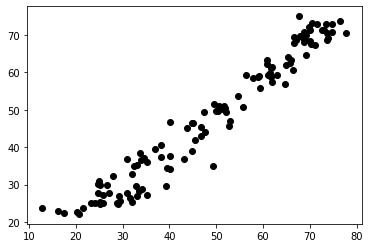

In [13]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

y_pred_test = regr.predict(x_test)
 
print('Test accuracy:')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

plt.scatter(y_test, y_pred_test, color='black')



In [25]:
#Based on the absolute value of the coefficients
#the top 3 predictors are   t-12    t-11 and  t-1
#with coefficient values of .1447, .1677 and .285 respectively 
print('Slope Coefficients:', regr.coef_)
print('Intercept = ', regr.intercept_)

Slope Coefficients: [ 0.14474261  0.1677608   0.09225585 -0.01887733 -0.04293305 -0.02021679
 -0.13758302 -0.12411277 -0.1045951  -0.01629743  0.14405783  0.28507058]
Intercept =  30.15585557023698


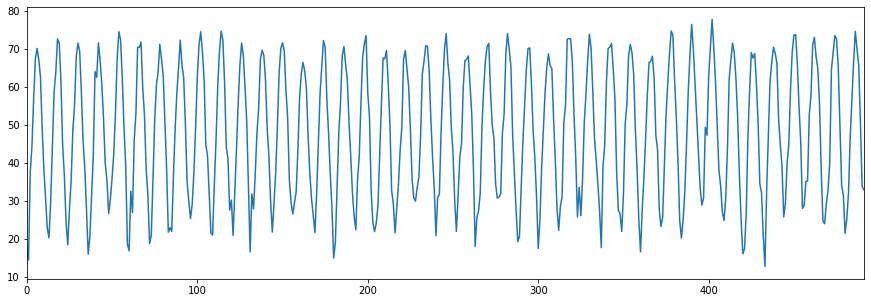

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

data['Temp'].plot(kind='line', figsize=(15,5))

In [16]:
def monthlyStandardize(months, values):
    Z = []
    for index, month in enumerate(months):
        month_indicies = [i for i , year in enumerate(months) if months[i] == month]
        Z.append((values[index] - values[month_indicies].mean())/values[month_indicies].std())
    return pd.Series(Z)

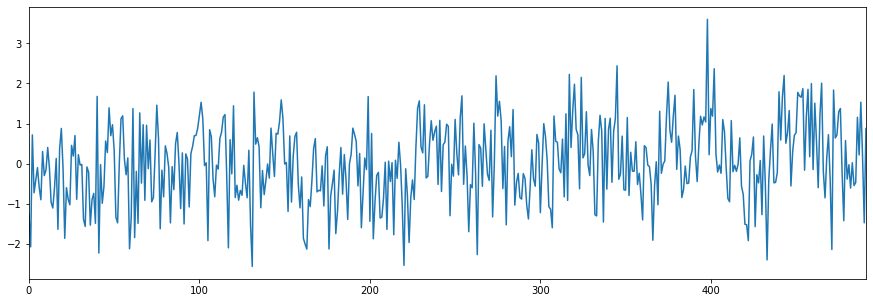

In [17]:
y = monthlyStandardize(data['Month'],data['Temp'])
y.plot(kind='line', figsize=(15,5))

In [19]:
window_size = 12
X = pd.DataFrame()

for i in range(0, 12):
    col_name = "t-" + str(12 - i)
    T = y.shift(periods = 12 - i).dropna()
    X[col_name] = T
    
X.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1
12,-1.265338,-2.077075,0.716492,-0.727075,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257
13,-2.077075,0.716492,-0.727075,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257,-0.103044
14,0.716492,-0.727075,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257,-0.103044,-0.964448
15,-0.727075,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257,-0.103044,-0.964448,-1.107546
16,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257,-0.103044,-0.964448,-1.107546,-0.603609


In [21]:
Y = y.shift(-12).dropna()
Y.head()

0   -0.103044
1   -0.964448
2   -1.107546
3   -0.603609
4    0.128208
dtype: float64

In [22]:
years = data['Year'].values
train_indicies = [index - 12 for index , year in enumerate(years) if year <= 2009 and year >= 1980]
test_indicies = [index - 12 for index , year in enumerate(years) if year <= 2019 and year >= 2010]

x_train = X.iloc[train_indicies]
x_test = X.iloc[test_indicies]
y_train = Y.iloc[train_indicies]
y_test = Y.iloc[test_indicies]

Test accuracy:
Root mean squared error = 50.8714
R-squared = -2448.9553


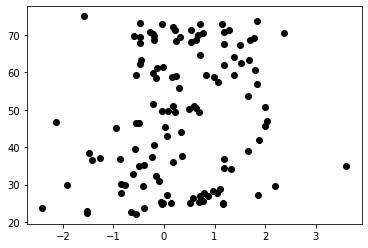

In [24]:
print('Test accuracy:')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))
plt.scatter(y_test, y_pred_test, color='black')

#The results after standardizing are much better, 
#the absolute values of coefficients are smaller


In [26]:
#Based on the coefficients, the top 3 predictors are T-1, T-2 and T-7
print('Slope Coefficients:', regr.coef_)
print('Intercept = ', regr.intercept_)

Slope Coefficients: [ 0.14474261  0.1677608   0.09225585 -0.01887733 -0.04293305 -0.02021679
 -0.13758302 -0.12411277 -0.1045951  -0.01629743  0.14405783  0.28507058]
Intercept =  30.15585557023698


In [27]:
y = monthlyStandardize(data['Month'],data['Temp'])
nao = monthlyStandardize(data['Month'],data['NAO'])
nino = monthlyStandardize(data['Month'],data['Nino'])
ncep = monthlyStandardize(data['Month'],data['NCEP_Air'])

In [29]:
window_size = 12
X["NAO"] = nao
X["Nino"] = nino
X["NCEP"] = ncep
X.head()

,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,NAO,Nino,NCEP
12,-1.265338,-2.077075,0.716492,-0.727075,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257,-1.684700,1.141504,-0.164654
13,-2.077075,0.716492,-0.727075,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257,-0.103044,-1.620431,-0.417767,-0.748996
14,0.716492,-0.727075,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257,-0.103044,-0.964448,-1.801388,-0.353641,-0.264748
15,-0.727075,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257,-0.103044,-0.964448,-1.107546,-1.849226,0.372944,1.029603
16,-0.422052,-0.100768,-0.588353,-0.901294,0.301936,-0.299974,-0.155285,0.401257,-0.103044,-0.964448,-1.107546,-0.603609,-1.674518,-0.123095,0.791575


In [31]:
Y.head()

0   -0.103044
1   -0.964448
2   -1.107546
3   -0.603609
4    0.128208
dtype: float64

In [32]:
years = data['Year'].values
train_indicies = [index - 12 for index , year in enumerate(years) if year <= 2009 and year >= 1980]
test_indicies = [index - 12 for index , year in enumerate(years) if year <= 2019 and year >= 2010]

x_train = X.iloc[train_indicies]
x_test = X.iloc[test_indicies]
y_train = Y.iloc[train_indicies]
y_test = Y.iloc[test_indicies]

Test accuracy:
Root mean squared error = 0.8045
R-squared = 0.3872


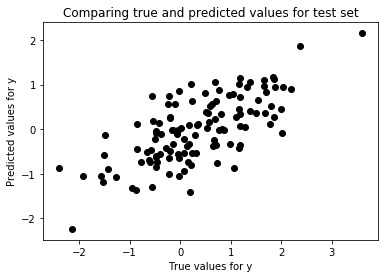

In [34]:
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

y_pred_test = regr.predict(x_test)


plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')


# Model evaluation
print('Test accuracy:')
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

plt.scatter(y_test, y_pred_test, color='black')


In [35]:
#The results after standardizing are better again,
#the absolute values of coefficients are smaller
print('Slope Coefficients:', regr.coef_)
print('Intercept = ', regr.intercept_)

Slope Coefficients: [-0.09371772  0.04035409 -0.02311207 -0.04337565  0.02242963  0.06562289
  0.03208569 -0.01213006  0.03312602  0.00307021  0.08812635  0.08697268
  0.04771792 -0.04202164  0.65528754]
Intercept =  -0.09030804620297334


In [36]:
#Based on the absolute value of the coefficients
#the top 3 predictors are   NCEP    t-12 and  t-2
#with coefficient values of .6552, -.0937 and .0881 respectively 